# Jupyter Notebook Slides Demo
## _How and why to put your Jupyter Notebooks into Docker containers_
---

### Brian Austin   
Data Scientist   
<img style="float: middle;padding:20px;width:150px" src="https://mma.prnewswire.com/media/819833/U_Group_Logo.jpg">


## What are Jupyter notebooks and how do I use them?

## Key Uses
- Designing, developing and testing solutions to problems using REPR capabilities

In [10]:
# how do I combine lists of dictionaries again?
print('is it this?')
d_a = [{'some':24,'stuff':14},{'other':68, 'things':84}]
d_b = [{'entirely':18,'added':77},{'more':66,'keys':27}]
all_dicts = list(map(lambda a,b: dict(a, **b), d_a, d_b))
all_dicts

is it this?


[{'some': 24, 'stuff': 14, 'entirely': 18, 'added': 77},
 {'other': 68, 'things': 84, 'more': 66, 'keys': 27}]

## Key Uses
- Presenting analyses I've completed, demonstrating _both_ the code and output for them in tidy concise cells like **this** one you're reading right here currently on this slide right now.

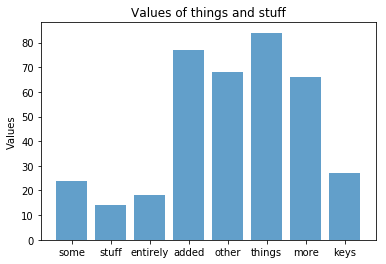

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
objects = list(x for sublist in all_dicts for x in sublist.keys())
y_pos = range(len(objects))
vals = [x for sublist in all_dicts for x in sublist.values()]

plt.bar(y_pos, vals, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Values of things and stuff')
plt.show()

## Key Uses
- Hands-on walkthroughs of new library modules, visualization techniques and strategies for attacking existing problems 

In [12]:
!ls -al

total 40
drwxr-xr-x  6 brianaustin  staff    192 Oct 28 10:38 .
drwxr-xr-x  6 brianaustin  staff    192 Oct 23 12:30 ..
drwxr-xr-x  3 brianaustin  staff     96 Oct 23 10:48 .ipynb_checkpoints
-rw-r--r--  1 brianaustin  staff    554 Oct 23 11:56 Dockerfile
-rw-r--r--  1 brianaustin  staff  16010 Oct 28 10:38 Jupyter Slides.ipynb
drwxr-xr-x  4 brianaustin  staff    128 Oct 28 10:37 src


**Notice the `src` tree with a module in it -- let's take a look at what's in there**

In [17]:
%%bash 
rm -rf src/__pycache__/

In [18]:
%%bash
tree src/

src/
├── __init__.py
└── new_module.py

0 directories, 2 files


In [14]:
%load_ext autoreload
%autoreload 2

from src import new_module

In [15]:
# this function is imported from the local src library 
new_module.reverse('reverse me') 

'em esrever'

## Major Drawbacks
   
_Why don't people collaborate on one another's Jupyter notebooks more often?_

### 1. Trying to organize things feels like more trouble than it's worth


The ad hoc nature of notebooks is excellent for trying things out but tends to run into problems when you need to reproduce your work for someone else. There are cells all over the place, they’ve been run in a random order as you tried to get something working. 



<img style="float: right;padding:20px;width:450px" src="https://media.giphy.com/media/47JYommcSWTeiHmG0B/giphy.gif">

#### _TFW somebody didn't clean up their notebooks and now there is a maze of errors_

### 2. Either include your expensive cleaning/training steps or have reproducible workflow
When you use Jupyter notebooks to develop workflows, you might spend a bunch of time doing expensive setup, cleaning, or training operations that you don’t necessarily need for a new audience to repeat. It might be easier if they could just start with the cleaned data, the trained model, and get right to the analysis.

### 3. Setting up an environment creates a lot of room for error
Even if you do want someone to repeat all your steps, ensuring they have their system set up in the same way you did when you made the initial analysis requires you to both do everything on your end correctly and also ensure that anyone you want to use your analysis can easily set up and get stated.    

 This step can be non-trivial. It might require you to save a requirements.txt file using the correct specific versions of your packages, make your module installable using a setup.py file, run a specific version of python, and ensure you don’t have any conflicting dependencies with any of your other libraries (or set up a virtual environment for just this analysis, install the requirements, and load the virtualenv as a conda environment that your Jupyter notebook can access, and be sure to activate it as the kernel used when you review the analysis).

So that means _after_ you're done you need to:

1. Save a `requirements.txt` file using the correct specific versions of your packages.

2. Make sure your code is usable for the versions of python your audience will need. Or include instructions on installation.

3. Make sure that any conflicting versions of packaging dependencies are worked out in the requirements file, not just for the packages you use, but for conflicts that might exist for any user. _Yikes._

#### _OR you could..._
4. Assume the audience will be able to set up a virtual environment for this analysis.

5. And that they will install the requirements into that virtual environment.

6. And that they will load the virtual environment as a conda environment that the Jupyter notebook can access, and activate that kernel when they start up the notebook

> *Sidenote: This is actually a really common pattern for me and a thing that I repeatedly have to Google.* **(python 3.6+)**    
>`python -m venv ~/place/for/envs/<ENV_NAME>`    
>`source ~/place/for/envs/<ENV_NAME>/bin/activate`   
>`pip install ipykernel jupyter`   
>`ipython kernel install --name=<ENV_NAME>`   


### 4. Version control is a nightmare
Raw `.ipynb` files contain tons of nested JSON, which updates each time a cell has been run -- which data scientists do frequently and meaninglessly. Re-running graphs or other large python objects also updates the giant binary blob that feeds the notebook backend. 

**Just don't expect to be able to diff changes in notebooks, basically ever.**

##### Yes, I know
There are good packages for this. 

## Why does any of this matter?
Yes, my work can be hard for someone else to pick up, but why should I care? I've already done the analysis.

## Analysis is only as good as your ability to communicate it

(and also, sometimes you're wrong...)

## Containerization
Docker containers can take some of these headaches away, or at least put them onto the developer/data scientist who built it
![](http://community.datacamp.com.s3.amazonaws.com/community/production/ckeditor_assets/pictures/204/content_docker.png)

### We'll walk through the steps to creating a Docker image from a Dockerfile, and build one together

## 1. Build a base image
Create a Dockerfile (just name the file "Dockerfile")

```
FROM FROM python:3.6-slim
RUN apt-get update && apt-get install -qq -y \
  build-essential libpq-dev libffi-dev --no-install-recommends
RUN apt-get install -y build-essential python3.6 python3-pip python3-dev
RUN pip3 -q install pip –upgrade
```


## 2. Set up the source code Docker will run

Let's take a look at the `src/` library we started working with earlier.

In [19]:
%%bash
ls -al src/

total 16
drwxr-xr-x  4 brianaustin  staff  128 Oct 28 10:41 .
drwxr-xr-x  6 brianaustin  staff  192 Oct 28 16:09 ..
-rw-r--r--  1 brianaustin  staff   26 Oct 23 11:47 __init__.py
-rw-r--r--  1 brianaustin  staff   75 Oct 23 11:53 new_module.py


## The "Why don't you just" slide
There are good alternative solutions to almost everything I've presented here. This is one way to do it. Do it other ways if you like those better!

### Alternatives list
- Simplify your notebook's json output for version control diffs with [nbconvert](https://nextjournal.com/schmudde/how-to-version-control-jupyter) or [nbdime](https://github.com/jupyter/nbdime)
- [Repo2Docker](https://hub.docker.com/r/jupyter/repo2docker), a Jupyter-built Docker image specifically for turning a git repository into a Jupyter-enabled 

## References and Resources

- [RISE](https://github.com/damianavila/RISE) is a Jupyter extension that allows running of notebooks iteratively as slides
- Matt Speck's [guide to launching slides](https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67)